<a href="https://colab.research.google.com/github/Timoayieko/Affirmations/blob/master/Che_loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting The Google Drive to Colab.

**1.   import**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Reading the CSV files**

In [12]:
loans_df= pd.read_csv('/content/drive/MyDrive/CSV_files/Loans.csv', sep=';')
emi_df= pd.read_csv('/content/drive/MyDrive/CSV_files/EMI.csv')
customer_df = pd.read_csv('/content/drive/MyDrive/CSV_files/Customer_Master.csv')
payment_df = pd.read_csv('/content/drive/MyDrive/CSV_files/Payment.csv')




**Removing Null Values**

In [13]:
null_values = loans_df.isnull().sum()

# Display the columns with null values and their respective counts
print("Columns with null values:")
print(null_values[null_values > 0])

loans_df = loans_df.dropna()

loans_df = loans_df.dropna(subset=['DateFinishedPayment'])

Columns with null values:
DateFinishedPayment    14785
dtype: int64


**Data Preparation**

In [14]:
# Convert 'DateFinishedPayment' and 'dateOfIssue' columns to datetime objects
loans_df['DateFinishedPayment'] = pd.to_datetime(loans_df['DateFinishedPayment'])
loans_df['dateOfIssue'] = pd.to_datetime(loans_df['dateOfIssue'])

# Check for missing values
print(loans_df['DateFinishedPayment'].isnull().sum())
print(loans_df['dateOfIssue'].isnull().sum())

# Check for non-numeric values
print(loans_df['DateFinishedPayment'].dtype)
print(loans_df['dateOfIssue'].dtype)


0
0
datetime64[ns]
datetime64[ns]


**Clusters for the loans**

In [15]:
# Calculate the repayment duration in months
loans_df['repayment_duration'] = ((loans_df['DateFinishedPayment'] - loans_df['dateOfIssue']).dt.days / 30).astype(float)
loans_df['repayment_duration'] = np.where(np.isfinite(loans_df['repayment_duration']), loans_df['repayment_duration'].astype(int), np.nan)

# Define a function to categorize the repayment duration
def categorize_repayment(duration):
    if duration <= 3:
        return '1-3 months'
    elif 4 <= duration <= 6:
        return '4-6 months'
    elif 7 <= duration <= 9:
        return '7-9 months'
    elif 10 <= duration <= 12:
        return '10-12 months'
    else:
        return 'Outlier'

# Apply the categorization function to create the new column 'repayment_category'
loans_df['repayment_category'] = loans_df['repayment_duration'].apply(categorize_repayment)

# Display the DataFrame with the new column
pd.set_option('display.expand_frame_repr', False)
print(loans_df)


          loan_id  customer_id  loan_type  principal  amountGiven         dateOfIssue  interestAmount  interestGiven  repaidPrincipal  repaidInterest  compliance_status overallDueDate DateFinishedPayment  frequency  returnPeriod  active  repayment_duration repayment_category
0              51     25748622          2      15000        15000 2018-01-12 00:00:00            7200           7200            15000            7200                  2     2019-01-12          2020-12-31          0            12       3                36.0            Outlier
1              52     13682491          2      15000        15000 2018-01-12 00:00:00            7200           7200            15000            7200                  2     2019-01-12          2020-09-24          0             0       3                32.0            Outlier
2              53     30781106          2      15000        15000 2018-01-12 00:00:00            7200           7200            15000            7200                  2    

**Filtering Outliers**

In [21]:
# Filter out outliers
filtered_loans_df = loans_df[loans_df['repayment_category'] != 'Outlier']

# Display the filtered DataFrame
print(filtered_loans_df)


          loan_id  customer_id  loan_type  principal  amountGiven         dateOfIssue  interestAmount  interestGiven  repaidPrincipal  repaidInterest  compliance_status overallDueDate DateFinishedPayment  frequency  returnPeriod  active  repayment_duration repayment_category  repayment_duration_months repayment_quarter
5              56      4054971          2      15000        15000 2018-01-12 00:00:00            7200           7200            15000            7200                  2     2019-01-12          2019-01-25          0             0       0                 378       10-12 months                  12.417871               NaN
8              65     24934356          2      10008        10000 2018-01-18 00:00:00            4800           4800            10008            4800                  2     2019-01-18          2019-01-23          0             0       0                 370       10-12 months                  12.155059               NaN
9              66     23442720       

**Checking Loans_df Dtypes**

In [17]:
print(loans_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14684 entries, 0 to 29368
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   loan_id                    14684 non-null  int64         
 1   customer_id                14684 non-null  int64         
 2   loan_type                  14684 non-null  int64         
 3   principal                  14684 non-null  int64         
 4   amountGiven                14684 non-null  int64         
 5   dateOfIssue                14684 non-null  datetime64[ns]
 6   interestAmount             14684 non-null  int64         
 7   interestGiven              14684 non-null  int64         
 8   repaidPrincipal            14684 non-null  int64         
 9   repaidInterest             14684 non-null  int64         
 10  compliance_status          14684 non-null  int64         
 11  overallDueDate             14684 non-null  object        
 12  Date

**Defining labels for quarters**

In [20]:
# Convert date columns to datetime objects
loans_df['dateOfIssue'] = pd.to_datetime(loans_df['dateOfIssue'])
loans_df['DateFinishedPayment'] = pd.to_datetime(loans_df['DateFinishedPayment'])

# Calculate the repayment duration in days
loans_df['repayment_duration'] = abs((loans_df['DateFinishedPayment'] - loans_df['dateOfIssue']).dt.days)

# Convert the repayment duration from days to months
loans_df['repayment_duration_months'] = loans_df['repayment_duration'] / 30.44  # Assuming an average month length of 30.44 days

# Define the boundaries for each quarter
quarter_bins = [0, 3, 6, 9, 12]  # Assuming quarters are 3-month periods

# Define labels for each quarter
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Create a new column 'repayment_quarter' to store the quarter information
loans_df['repayment_quarter'] = pd.cut(loans_df['repayment_duration_months'], bins=quarter_bins, labels=quarter_labels)

# Display the DataFrame with the new column
print(loans_df)



          loan_id  customer_id  loan_type  principal  amountGiven         dateOfIssue  interestAmount  interestGiven  repaidPrincipal  repaidInterest  compliance_status overallDueDate DateFinishedPayment  frequency  returnPeriod  active  repayment_duration repayment_category  repayment_duration_months repayment_quarter
0              51     25748622          2      15000        15000 2018-01-12 00:00:00            7200           7200            15000            7200                  2     2019-01-12          2020-12-31          0            12       3                1084            Outlier                  35.611038               NaN
1              52     13682491          2      15000        15000 2018-01-12 00:00:00            7200           7200            15000            7200                  2     2019-01-12          2020-09-24          0             0       3                 986            Outlier                  32.391590               NaN
2              53     30781106       

**Loan Completion Draft 1**

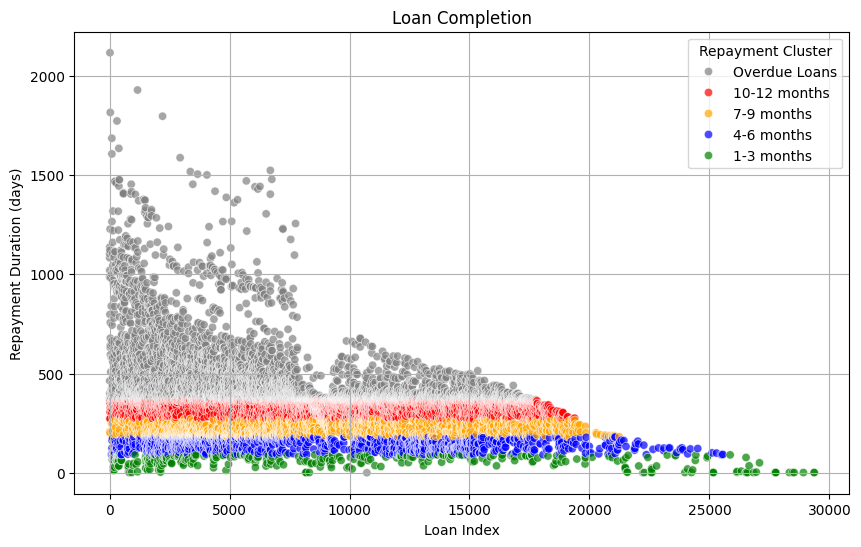

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the clusters
clusters = {
    '1-3 months': (1, 90),
    '4-6 months': (91, 180),
    '7-9 months': (181, 270),
    '10-12 months': (271, 365)
}

# Create a new column for cluster category
loans_df['repayment_cluster'] = 'Overdue Loans'  # Default value for loans outside the defined clusters

# Assign clusters based on the repayment_duration
for cluster, (start, end) in clusters.items():
    loans_df.loc[(loans_df['repayment_duration'] >= start) & (loans_df['repayment_duration'] <= end), 'repayment_cluster'] = cluster

# Set up the color palette for each cluster
palette = {'1-3 months': 'green', '4-6 months': 'blue', '7-9 months': 'orange', '10-12 months': 'red', 'Overdue Loans': 'grey'}

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=loans_df.index, y=loans_df['repayment_duration'], hue=loans_df['repayment_cluster'], palette=palette, alpha=0.7)

# Set labels and title
plt.title('Loan Completion')
plt.xlabel('Loan Index')
plt.ylabel('Repayment Duration (days)')

# Show the legend
plt.legend(title='Repayment Cluster')

# Show the plot
plt.grid(True)
plt.show()


**Loan completion draft 2**

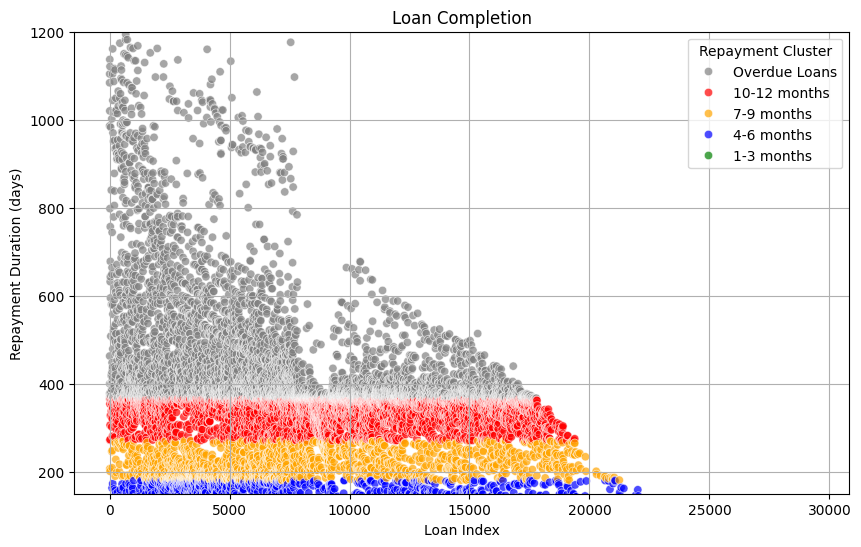

In [29]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=loans_df.index, y=loans_df['repayment_duration'], hue=loans_df['repayment_cluster'], palette=palette, alpha=0.7)

# Set labels and title
plt.title('Loan Completion')
plt.xlabel('Loan Index')
plt.ylabel('Repayment Duration (days)')

# Set the y-axis limits
plt.ylim(150, 1200)

# Show the legend
plt.legend(title='Repayment Cluster')

# Show the plot
plt.grid(True)
plt.show()


**Loan Completion Draft 3**

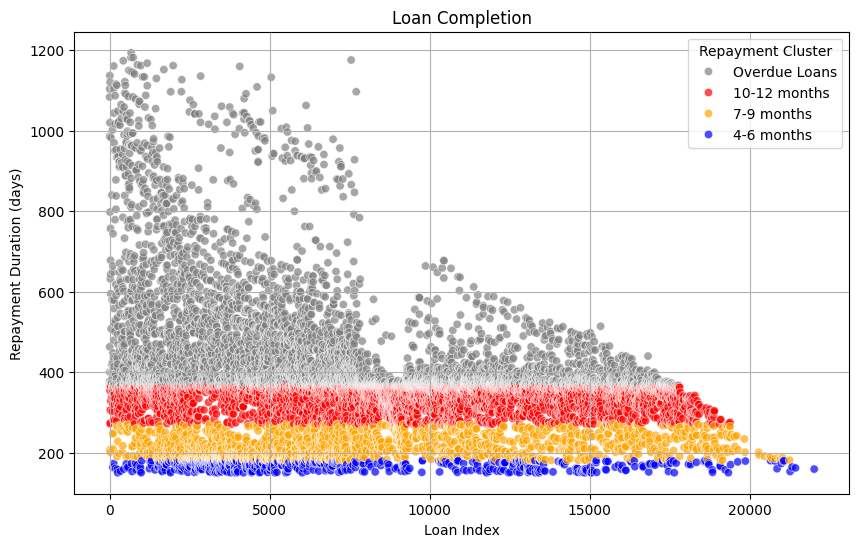

In [30]:
# Filter out loans with repayment durations outside the desired range (150 days to 1200 days)
filtered_loans_df = loans_df[(loans_df['repayment_duration'] >= 150) & (loans_df['repayment_duration'] <= 1200)]

# Create a scatter plot for the filtered loans
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_loans_df.index, y=filtered_loans_df['repayment_duration'], hue=filtered_loans_df['repayment_cluster'], palette=palette, alpha=0.7)

# Set labels and title
plt.title('Loan Completion')
plt.xlabel('Loan Index')
plt.ylabel('Repayment Duration (days)')

# Show the legend
plt.legend(title='Repayment Cluster')

# Show the plot
plt.grid(True)
plt.show()


# **Loan Completion Final**

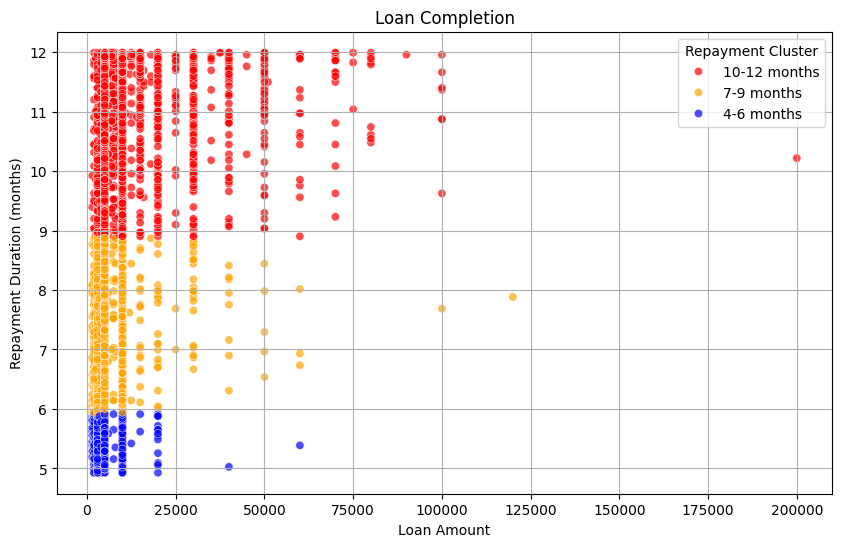

Percentage of Loans Completed per Cluster:
10-12 months    66.370199
7-9 months      24.542408
4-6 months       9.087394
Name: repayment_cluster, dtype: float64


In [32]:


# Convert repayment duration from days to months
filtered_loans_df['repayment_duration_months'] = filtered_loans_df['repayment_duration'] / 30

# Filter out loans with repayment durations outside the desired range (150 days to 1200 days)
filtered_loans_df = loans_df[(loans_df['repayment_duration'] >= 150) & (loans_df['repayment_duration'] <= 1200)]

# Filter out overdue loans
filtered_loans_df = filtered_loans_df[filtered_loans_df['repayment_cluster'] != 'Overdue Loans']

# Calculate the percentage of loans completed per cluster
percentage_per_cluster = filtered_loans_df['repayment_cluster'].value_counts(normalize=True) * 100

# Create a scatter plot for the filtered loans
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_loans_df['amountGiven'], y=filtered_loans_df['repayment_duration_months'], hue=filtered_loans_df['repayment_cluster'], palette=palette, alpha=0.7)

# Set labels and title
plt.title('Loan Completion')
plt.xlabel('Loan Amount')
plt.ylabel('Repayment Duration (months)')

# Show the legend
plt.legend(title='Repayment Cluster')

# Show the plot
plt.grid(True)
plt.show()

# Display the percentage of loans completed per cluster
print("Percentage of Loans Completed per Cluster:")
print(percentage_per_cluster)


**Percentage of Loans Completed per Cluster Pie Chart**





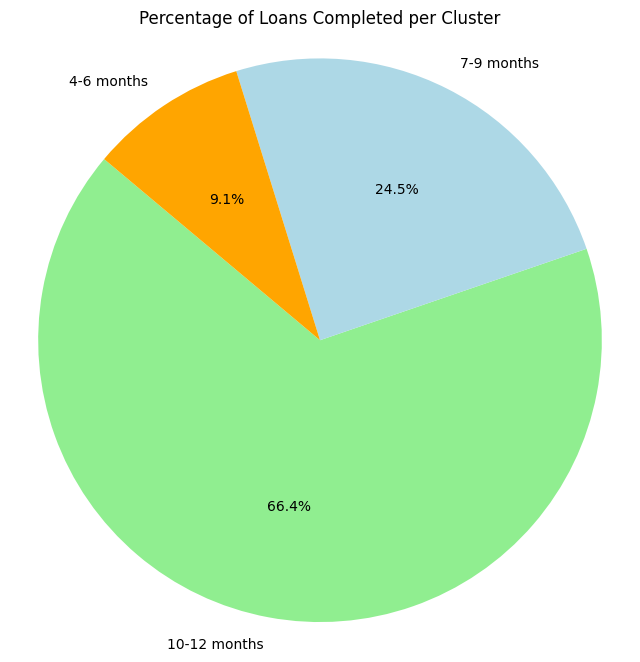

In [33]:
import matplotlib.pyplot as plt

# Define the labels and sizes for the pie chart
labels = percentage_per_cluster.index
sizes = percentage_per_cluster.values

# Define the colors for the pie chart
colors = ['lightgreen', 'lightblue', 'orange', 'lightcoral']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Percentage of Loans Completed per Cluster')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


Creating Grouped_df with

In [49]:

from datetime import datetime

# loans_df is the DataFrame containing loan information

# Convert date columns to datetime objects
loans_df['dateOfIssue'] = pd.to_datetime(loans_df['dateOfIssue'])
loans_df['DateFinishedPayment'] = pd.to_datetime(loans_df['DateFinishedPayment'])

# Filter loans issued between January 2023 and current date
filtered_loans_df = loans_df[(loans_df['dateOfIssue'] >= '2023-01-01') & (loans_df['dateOfIssue'] <= datetime.now())]

# Group by month and year, calculate total disbursed and total collected amounts for principal and interest
grouped_df = filtered_loans_df.groupby([filtered_loans_df['dateOfIssue'].dt.strftime('%B %Y')]).agg(
    Total_Disbursed_Principal=('principal', 'sum'),
    Total_Disbursed_Interest=('interestAmount', 'sum'),
    Total_Collected_Principal=('repaidPrincipal', 'sum'),
    Total_Collected_Interest=('repaidInterest', 'sum')
).reset_index()

# Calculate total amount disbursed and collected overall
total_disbursed = grouped_df['Total_Disbursed_Principal'].sum()

# Display the new DataFrame
grouped_df


,dateOfIssue,Total_Disbursed_Principal,Total_Disbursed_Interest,Total_Collected_Principal,Total_Collected_Interest
0,April 2023,900528,486000,900528,486000
1,August 2023,655627,261327,655627,261327
2,December 2023,281891,36988,281891,36988
3,February 2023,5323188,2836680,5323188,2836680
4,February 2024,172430,17244,172430,17244
5,January 2023,4896684,2596800,4896684,2596800
6,January 2024,102280,10228,102280,10228
7,July 2023,30024,16200,30024,16200
8,June 2023,420120,219600,420120,219600
9,March 2023,1375788,742500,1375788,742500


,dateOfIssue,Total_Disbursed_Principal,Total_Disbursed_Interest,Total_Collected_Principal,Total_Collected_Interest
0,April 2023,900528,486000,900528,486000
1,August 2023,655627,261327,655627,261327
2,December 2023,281891,36988,281891,36988
3,February 2023,5323188,2836680,5323188,2836680
4,February 2024,172430,17244,172430,17244
5,January 2023,4896684,2596800,4896684,2596800
6,January 2024,102280,10228,102280,10228
7,July 2023,30024,16200,30024,16200
8,June 2023,420120,219600,420120,219600
9,March 2023,1375788,742500,1375788,742500


In [46]:
import pandas as pd
from datetime import datetime

#loans_df is the DataFrame containing loan information

# Convert date columns to datetime objects
loans_df['dateOfIssue'] = pd.to_datetime(loans_df['dateOfIssue'])
loans_df['DateFinishedPayment'] = pd.to_datetime(loans_df['DateFinishedPayment'])

# Filter loans issued between January 2023 and the current date
filtered_loans_df = loans_df[(loans_df['dateOfIssue'] >= '2023-01-01') & (loans_df['dateOfIssue'] <= datetime.now())]

# Group by month and year, calculate total disbursed and total collected amounts for principal and interest
grouped_df = filtered_loans_df.groupby([filtered_loans_df['dateOfIssue'].dt.strftime('%B %Y')]).agg(
    Total_Disbursed_Principal=('principal', 'sum'),
    Total_Disbursed_Interest=('interestAmount', 'sum'),
    Total_Collected_Principal=('repaidPrincipal', 'sum'),
    Total_Collected_Interest=('repaidInterest', 'sum')
).reset_index()

# Calculate total amount disbursed overall
total_disbursed = grouped_df['Total_Disbursed_Principal'].sum() + grouped_df['Total_Disbursed_Interest'].sum()

# Calculate total amount collected overall
total_collected = grouped_df['Total_Collected_Principal'].sum() + grouped_df['Total_Collected_Interest'].sum()

# Calculate the percentage of disbursed over collected
percentage_disbursed_over_collected = (total_disbursed / total_collected) * 100

# Print total disbursed, total collected, and percentage disbursed over collected
print(f"Total Disbursed: {total_disbursed}")
print(f"Total Collected: {total_collected}")
print(f"Percentage of Disbursed over Collected: {percentage_disbursed_over_collected:.2f}%")


Total Disbursed: 23549541
Total Collected: 23549541
Percentage of Disbursed over Collected: 100.00%


In [47]:
import pandas as pd
from datetime import datetime

# Assuming loans_df is your DataFrame containing loan information

# Convert date columns to datetime objects
loans_df['dateOfIssue'] = pd.to_datetime(loans_df['dateOfIssue'])
loans_df['DateFinishedPayment'] = pd.to_datetime(loans_df['DateFinishedPayment'])

# Filter loans issued between January 2023 and current date
filtered_loans_df = loans_df[(loans_df['dateOfIssue'] >= '2023-01-01') & (loans_df['dateOfIssue'] <= datetime.now())]

# Group by month and year, calculate total disbursed and total collected amounts for principal and interest
grouped_df = filtered_loans_df.groupby([filtered_loans_df['dateOfIssue'].dt.strftime('%B %Y')]).agg(
    Total_Disbursed_Principal=('principal', 'sum'),
    Total_Disbursed_Interest=('interestAmount', 'sum'),
    Total_Collected_Principal=('repaidPrincipal', 'sum'),
    Total_Collected_Interest=('repaidInterest', 'sum')
).reset_index()

# Calculate total amount disbursed and collected overall
total_disbursed = grouped_df[['Total_Disbursed_Principal', 'Total_Disbursed_Interest']].sum().sum()
total_collected = grouped_df[['Total_Collected_Principal', 'Total_Collected_Interest']].sum().sum()

# Calculate percentage of disbursed over collected
percentage_disbursed_over_collected = (total_disbursed / total_collected) * 100

# Print total disbursed, total collected, and percentage disbursed over collected
print(f"Total Disbursed: {total_disbursed}")
print(f"Total Collected: {total_collected}")
print(f"Percentage of Disbursed over Collected: {percentage_disbursed_over_collected:.2f}%")

# Display the grouped DataFrame
print(grouped_df)


Total Disbursed: 23549541
Total Collected: 23549541
Percentage of Disbursed over Collected: 100.00%
       dateOfIssue  Total_Disbursed_Principal  Total_Disbursed_Interest  Total_Collected_Principal  Total_Collected_Interest
0       April 2023                     900528                    486000                     900528                    486000
1      August 2023                     655627                    261327                     655627                    261327
2    December 2023                     281891                     36988                     281891                     36988
3    February 2023                    5323188                   2836680                    5323188                   2836680
4    February 2024                     172430                     17244                     172430                     17244
5     January 2023                    4896684                   2596800                    4896684                   2596800
6     January 2024       

In [38]:

# Convert date columns to datetime objects if they are not already
loans_df['dateOfIssue'] = pd.to_datetime(loans_df['dateOfIssue'])
loans_df['DateFinishedPayment'] = pd.to_datetime(loans_df['DateFinishedPayment'])

# Filter data for the time period from January 2023 to the current date
filtered_df = loans_df[(loans_df['dateOfIssue'] >= '2023-01-01') & (loans_df['DateFinishedPayment'] <= pd.Timestamp.today())]

# Extract month and year from the 'dateOfIssue' column
filtered_df['Month'] = filtered_df['dateOfIssue'].dt.month
filtered_df['Year'] = filtered_df['dateOfIssue'].dt.year

# Group by month and year and calculate total disbursed and total collected amounts for principal and interest
monthly_summary = filtered_df.groupby(['Year', 'Month']).agg(
    Total_Disbursed_Principal=('principal', 'sum'),
    Total_Disbursed_Interest=('interestAmount', 'sum'),
    Total_Collected_Principal=('repaidPrincipal', 'sum'),
    Total_Collected_Interest=('repaidInterest', 'sum')
).reset_index()

# Display the monthly summary
print(monthly_summary)


    Year  Month  Total_Disbursed_Principal  Total_Disbursed_Interest  Total_Collected_Principal  Total_Collected_Interest
0   2023      1                    4896684                   2596800                    4896684                   2596800
1   2023      2                    5323188                   2836680                    5323188                   2836680
2   2023      3                    1375788                    742500                    1375788                    742500
3   2023      4                     900528                    486000                     900528                    486000
4   2023      5                     485292                    258300                     485292                    258300
5   2023      6                     420120                    219600                     420120                    219600
6   2023      7                      30024                     16200                      30024                     16200
7   2023      8         

<ipython-input-38-8c9e83c5ff3f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['dateOfIssue'].dt.month
<ipython-input-38-8c9e83c5ff3f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['dateOfIssue'].dt.year


In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# # Assuming 'timestamp' is the column containing timestamp values in your DataFrame
# loans_df['dateOfIssue'] = pd.to_datetime(loans_df['dateOfIssue'])

# # Extract numerical features from timestamp
# loans_df['dateOfIssue'] = loans_df['dateOfIssue'].astype(int)
# loans_df['DateFinishedPayment'] = loans_df['DateFinishedPayment'].astype(int)
# # Convert to Unix timestamp (seconds since 1970-01-01)
# loans_df['overallDueDate'] = (loans_df['overallDueDate'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
# loans_df['overallDueDate'] = loans_df['overallDueDate'].astype(int)



In [ ]:
# Convert date columns to datetime objects
payment_df['DateOfPayment'] = pd.to_datetime(payment_df['DateOfPayment'])
emi_df['dueDate'] = pd.to_datetime(emi_df['dueDate'])
loans_df['dateOfIssue'] = pd.to_datetime(loans_df['dateOfIssue'])

# Filter records for January 2020
payment_df = payment_df[payment_df['DateOfPayment'].dt.year == 2020]
emi_df = emi_df[emi_df['dueDate'].dt.year == 2020]
loans_df = loans_df[loans_df['dateOfIssue'].dt.year == 2020]


In [ ]:
# Merge DataFrames using common keys
merged_df = pd.merge(payment_df, emi_df, on=['loan_id', 'installment_no'])
merged_df = pd.merge(merged_df, loans_df, on='loan_id')
merged_df = pd.merge(merged_df, customer_df, on='customer_id')


In [ ]:
merged_df


In [ ]:
# Selecting the necessary columns
selected_columns = ['loan_id', 'amount', 'paid_principal', 'paid_interest',
                    'dateOfIssue', 'overallDueDate', 'c_name']

# Creating a new DataFrame with the selected columns
mapped_df = merged_df[selected_columns].copy()

# Convert 'overallDueDate' and 'dateOfIssue' columns to datetime data type
mapped_df['overallDueDate'] = pd.to_datetime(mapped_df['overallDueDate'])
mapped_df['dateOfIssue'] = pd.to_datetime(mapped_df['dateOfIssue'])

# Calculating loan duration
mapped_df['loan_duration'] = (mapped_df['overallDueDate'] - mapped_df['dateOfIssue']).dt.days

# Assigning a fixed repayment duration of 12 months (12 * 30 days)
mapped_df['repayment_duration'] = 12 * 30

# Renaming columns for clarity
mapped_df = mapped_df.rename(columns={'amount': 'amount_paid',
                                      'paid_principal': 'principal_paid',
                                      'paid_interest': 'interest_paid',
                                      'c_name': 'customer_name'})


pd.set_option('display.expand_frame_repr', False)
print(mapped_df)



In [ ]:
!pip install openpyxl

In [ ]:
mapped_df.to_excel('data.xlsx', index=False)

# Optionally, you can download the file to your local machine
from google.colab import files
files.download('data.xlsx')

In [ ]:
!pip install calendar

import calendar

# Convert 'overallDueDate' column to datetime
merged_df['overallDueDate'] = pd.to_datetime(merged_df['overallDueDate'])

# Extract month and year from the 'DateOfPayment' column
merged_df['Month'] = merged_df['DateOfPayment'].dt.month
merged_df['Month'] = merged_df['Month'].apply(lambda x: calendar.month_name[x])  # Convert month number to month name
merged_df['Year'] = merged_df['DateOfPayment'].dt.year

# Define a function to categorize payments
def categorize_payment(row):
    # Calculate months difference between payment date and overall due date
    months_diff = (row['DateOfPayment'] - row['overallDueDate']).days / 30

    if months_diff <= 0:
        return 'Prepayment'
    elif 0 < months_diff <= 12:
        return 'On-time payment'
    else:
        return 'Overdue payment'

# Apply the categorize_payment function to each row
merged_df['PaymentCategory'] = merged_df.apply(categorize_payment, axis=1)

# Aggregate payments based on month, year, and payment category
payment_summary = merged_df.groupby(['Year', 'Month', 'PaymentCategory']).agg({'amount': 'sum'}).reset_index()

# Pivot the data to get the desired format
payment_summary_pivot = payment_summary.pivot_table(index=['Year', 'Month'],
                                                    columns='PaymentCategory',
                                                    values='amount',
                                                    fill_value=0).reset_index()

# Rename the columns
payment_summary_pivot.columns.name = None  # Remove column index name
payment_summary_pivot = payment_summary_pivot.rename(columns={'Prepayment': 'prepayment',
                                                              'On-time payment': 'ontimepayment',
                                                              'Overdue payment': 'overdue'})

# Display the resulting DataFrame
print(payment_summary_pivot)


In [ ]:
merged_df

In [ ]:
import datetime
merged_df['dateOfIssue'] = pd.to_datetime(merged_df['dateOfIssue'])
merged_df['DateFinishedPayment'] = pd.to_datetime(merged_df['DateFinishedPayment'])

def categorize_loan(row):
    months_diff = (row['DateFinishedPayment'] - row['dateOfIssue']).days / 30

    if months_diff <= 3:
        return ' A'
    elif 4 <= months_diff <= 6:
        return ' B'
    elif 7 <= months_diff <= 9:
        return ' C '
    elif 10 <= months_diff <= 12:
        return ' D '
    else:
        return ' Overdue Loan '

# Apply the categorization function to the DataFrame
merged_df['RepaymentCategory'] = merged_df.apply(categorize_loan, axis=1)


In [ ]:
import datetime

merged_df['overallDueDate'] = pd.to_datetime(merged_df['overallDueDate'])

# Extract month and year from the 'DateOfPayment' column
merged_df['Month'] = merged_df['DateOfPayment'].dt.month
merged_df['Year'] = merged_df['DateOfPayment'].dt.year

# Define a function to categorize payments
def categorize_payment(row):
    # Calculate months difference between payment date and overall due date
    months_diff = (row['DateOfPayment'] - row['overallDueDate']).days / 30

    if months_diff <= 0:
        return 'Prepayment'
    elif 0 < months_diff <= 12:
        return 'On-time payment'
    else:
        return 'Overdue payment'

# Apply the categorize_payment function to each row
merged_df['PaymentCategory'] = merged_df.apply(categorize_payment, axis=1)

# Aggregate payments based on month, year, and payment category
payment_summary =merged_df.groupby(['Year', 'Month', 'PaymentCategory']).agg({'amount': 'sum'}).reset_index()

# Pivot the data to get the desired format
payment_summary_pivot = payment_summary.pivot_table(index=['Year', 'Month'],
                                                    columns='PaymentCategory',
                                                    values='amount',
                                                    fill_value=0).reset_index()

# Rename the columns
payment_summary_pivot.columns.name = None  # Remove column index name
payment_summary_pivot = payment_summary_pivot.rename(columns={'Prepayment': 'prepayment',
                                                              'On-time payment': 'ontimepayment',
                                                              'Overdue payment': 'overdue'})

# Display the resulting DataFrame
print(payment_summary_pivot)

In [ ]:
columns_to_drop = ['passport_photo', 'id_photo', 'back_id','email','country','noOfChildren','businesstype','businesstype_other','residence','position','c_name','phone','dob','housing','group','c_name','phone','yearsinbusiness','county','group','officer_id','gender','payment_id','emi_id','group_id','position','created','market']
merged_df.drop(columns=columns_to_drop, inplace=True)
merged_df

In [ ]:
# prompt: print hello world using rot13

def rot13(message):
  """
  This function encodes a message using the ROT13 cipher.
  """
  encoded_chars = []
  for char in message:
    if 'a' <= char <= 'z':
      encoded_char = chr(((ord(char) - ord('a') + 13) % 26) + ord('a'))
    elif 'A' <= char <= 'Z':
      encoded_char = chr(((ord(char) - ord('A') + 13) % 26) + ord('A'))
    else:
      encoded_char = char
    encoded_chars.append(encoded_char)
  return ''.join(encoded_chars)

# Example usage
message = "Hello, world!"
encoded_message = rot13(message)
print(encoded_message)  # Output: "Uryyb, jbeyq!"


In [ ]:
merged_df

In [ ]:
columns_to_drop = ['']
merged_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
merged_df

In [ ]:
print(merged_df.columns)

In [ ]:
payment_df


In [ ]:

emi_df

In [ ]:
loans_df


In [ ]:
customer_df


In [ ]:
columns_to_drop = ['passport_photo', 'id_photo', 'back_id','email','country','noOfChildren','businesstype','businesstype_other','residence','position','c_name','phone','dob','housing','group']
customer_df.drop(columns=columns_to_drop, inplace=True)
customer_df


In [ ]:
merged_data = pd.merge(loans_df, emi_df, on='loan_id')
merged_data = pd.merge(merged_data, payment_df, on='loan_id')
merged_data = pd.merge(merged_data, customer_df, on='customer_id')
